In [1]:
print('Start import')
import socket 
import strax
import straxen
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd
print(
f'''Working on {socket.getfqdn()} with the following versions 
and installation paths:
strax
\tv{strax.__version__}\t{str(strax.__path__[0])}
straxen
\tv{straxen.__version__}\t{str(straxen.__path__[0])}
''')
import peaks_utility as psu

Start import
Working on midway2-0416.rcc.local with the following versions 
and installation paths:
strax
	v0.12.2	/dali/lgrandi/strax/strax/strax
straxen
	v0.11.0	/dali/lgrandi/strax/straxen/straxen



In [2]:
st = straxen.contexts.xenonnt_online()

In [3]:
st.set_context_config({'check_available': ('raw_records', 'records', 'peaklets', 'peak_basics')})
st.select_runs()

Checking data availability: 100%|██████████| 4/4 [00:57<00:00, 14.33s/it]


,name,number,mode,start,end,tags,livetime,records_available,peak_basics_available,raw_records_available,peaklets_available
0,009532,9532,electrode_test,2020-10-22 08:09:22.127,2020-10-22 08:09:39.212,,00:00:17.085000,False,False,False,False
1,009531,9531,tpc_exttrig,2020-10-22 07:57:08.321,2020-10-22 07:57:19.496,,00:00:11.175000,False,False,False,False
2,009530,9530,tpc_exttrig,2020-10-22 07:56:03.950,2020-10-22 07:56:33.095,,00:00:29.145000,False,False,False,False
3,009529,9529,tpc_exttrig,2020-10-22 07:42:58.695,2020-10-22 07:43:24.884,,00:00:26.189000,False,False,False,False
4,009528,9528,tpc_selftrigger_commissioning_highthresh,2020-10-22 07:33:35.892,2020-10-22 07:33:44.018,,00:00:08.126000,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
256,009276,9276,tpc_selftrigger_commissioning,2020-10-07 12:38:18.278,2020-10-07 12:38:53.320,,00:00:35.042000,True,False,False,False
257,009275,9275,tpc_selftrigger_commissioning,2020-10-07 12:33:23.865,2020-10-07 12:34:02.911,messy,00:00:39.046000,True,False,False,False
258,009274,9274,tpc_selftrigger_commissioning,2020-10-07 12:31:07.650,2020-10-07 12:31:39.688,,00:00:32.038000,False,False,False,False
259,009273,9273,tpc_noise,2020-10-07 12:29:54.507,2020-10-07 12:30:44.564,,00:00:50.057000,False,False,False,False


In [5]:
runs = st.select_runs(available = 'peaklets', exclude_tags = ('bad', 'messy'))

In [7]:
#run_id = '009375'
def plot_area_width(st, run_id = '009510'):
    if (st.is_stored(run_id, "peak_basics")):
        #peaks = st.get_array(run_id, targets = ('peak_basics'), #seconds_range = (0, 10),
                             #progress_bar=False)
        #print(f'Loaded {peaks.nbytes/1e6:.1f} MB of peaks-data')
        data = psu.select_data(st,run_id)
        psu.plot_area_width(data,0,4.5,1,4)
        plt.title(f'run {run_id}')
    else: print('peak_basics is not stored')

In [8]:
peaks_0 = st.get_array('009510', targets = ('peak_basics'), progress_bar=False)
peaks_1 = st.get_array('009512', targets = ('peak_basics'), progress_bar=False)
peaks_2 = st.get_array('009514', targets = ('peak_basics'), progress_bar=False)
peaks_3 = st.get_array('009516', targets = ('peak_basics'), progress_bar=False)
peaks_4 = st.get_array('009521', targets = ('peak_basics'), progress_bar=False)
peaks_5 = st.get_array('009523', targets = ('peak_basics'), progress_bar=False)

679.02602676 700.24113219 751.56068539 664.01024143 627.70145658 730.50603554


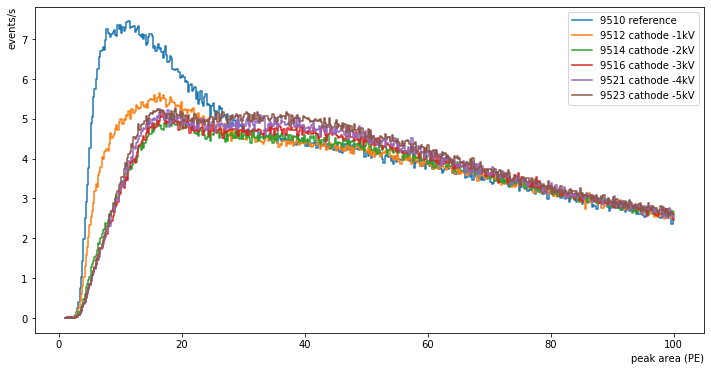

In [60]:
from multihist import Hist1d, Histdd
lowl, highl = 1, 3
lol, higl = 1, 100
plt.figure(figsize=(12,6))
livetime0 = (peaks_0['time'][len(peaks_0)-1]-peaks_0['time'][0])/1e9
livetime1 = (peaks_1['time'][len(peaks_1)-1]-peaks_1['time'][0])/1e9
livetime2 = (peaks_2['time'][len(peaks_2)-1]-peaks_2['time'][0])/1e9
livetime3 = (peaks_3['time'][len(peaks_3)-1]-peaks_3['time'][0])/1e9
livetime4 = (peaks_4['time'][len(peaks_4)-1]-peaks_4['time'][0])/1e9
livetime5 = (peaks_5['time'][len(peaks_5)-1]-peaks_5['time'][0])/1e9
print(livetime0,livetime1,livetime2,livetime3,livetime4,livetime5)
p_area0 = Hist1d(peaks_0['area'], bins=(np.logspace(lowl, highl, 500)))
p_area1 = Hist1d(peaks_1['area'], bins=(np.logspace(lowl, highl, 500)))
p_area2 = Hist1d(peaks_2['area'], bins=(np.logspace(lowl, highl, 500)))
p_area3 = Hist1d(peaks_3['area'], bins=(np.logspace(lowl, highl, 500)))
p_area4 = Hist1d(peaks_4['area'], bins=(np.logspace(lowl, highl, 500)))
p_area5 = Hist1d(peaks_5['area'], bins=(np.logspace(lowl, highl, 500)))
p_are0 = Hist1d(peaks_0['area'], bins=(np.linspace(lol, higl, 500)))
p_are1 = Hist1d(peaks_1['area'], bins=(np.linspace(lol, higl, 500)))
p_are2 = Hist1d(peaks_2['area'], bins=(np.linspace(lol, higl, 500)))
p_are3 = Hist1d(peaks_3['area'], bins=(np.linspace(lol, higl, 500)))
p_are4 = Hist1d(peaks_4['area'], bins=(np.linspace(lol, higl, 500)))
p_are5 = Hist1d(peaks_5['area'], bins=(np.linspace(lol, higl, 500)))
p_area0 /= livetime0
p_area1 /= livetime1
p_area2 /= livetime2
p_area3 /= livetime3
p_area4 /= livetime4
p_area5 /= livetime5
p_are0 /= livetime0
p_are1 /= livetime1
p_are2 /= livetime2
p_are3 /= livetime3
p_are4 /= livetime4
p_are5 /= livetime5
p_are0.plot(label='9510 reference')
p_are1.plot(label='9512 cathode -1kV')
p_are2.plot(label='9514 cathode -2kV')
p_are3.plot(label='9516 cathode -3kV')
p_are4.plot(label='9521 cathode -4kV')
p_are5.plot(label='9523 cathode -5kV')
plt.xlabel("peak area (PE)", ha='right', x=1)
plt.ylabel("events/s", ha='right', y=1)
#plt.xscale('log')
plt.legend()

11.317100446000001


<Figure size 864x432 with 0 Axes>

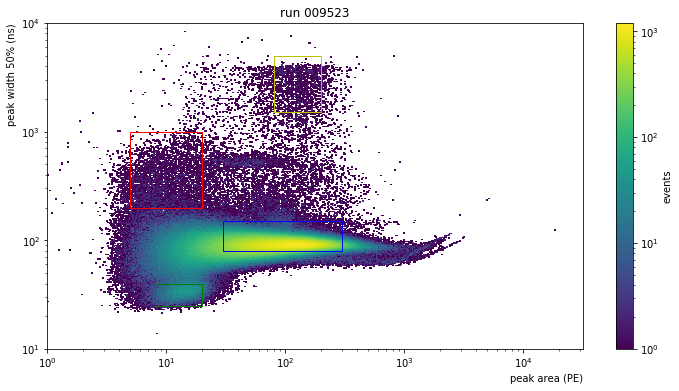

In [31]:
plt.figure(figsize=(12,6))
area_cut1 = (30,300)
area_cut2 = (5,20)
area_cut3 = (80,200)
area_cut4 = (8,20)
width_cut1 = (80,150)
width_cut2 = (200,1000)
width_cut3 = (1500,5000)
width_cut4 = (25,40)
plot_area_width(st, '009523')
psu.rectangle(area_cut1,width_cut1,'b')
psu.rectangle(area_cut2,width_cut2,'r')
psu.rectangle(area_cut3,width_cut3,'y')
psu.rectangle(area_cut4,width_cut4,'g')

In [44]:
selected_peaks1 = peaks[(peaks['area']>area_cut1[0]) & (peaks['area']<area_cut1[1]) &
                       (peaks['range_50p_area']>width_cut1[0]) & (peaks['range_50p_area']<width_cut1[1])]
selected_peaks2 = peaks[(peaks['area']>area_cut2[0]) & (peaks['area']<area_cut2[1]) &
                       (peaks['range_50p_area']>width_cut2[0]) & (peaks['range_50p_area']<width_cut2[1])]
selected_peaks3 = peaks[(peaks['area']>area_cut3[0]) & (peaks['area']<area_cut3[1]) &
                       (peaks['range_50p_area']>width_cut3[0]) & (peaks['range_50p_area']<width_cut3[1])]

In [3]:
def plotwf(peaks,nn,area_cut,width_cut,color='b'):
    peaks=peaks[(peaks['area']<area_cut[1])&(peaks['area']>area_cut[0])&
                     (peaks['range_50p_area']<width_cut[1])&
                      (peaks['range_50p_area']>width_cut[0])]
    dt = peaks['dt'][0]
    print('total number of records',peaks['data'].shape[0])
    dts = np.arange(0,peaks['data'].shape[1]*dt,dt)
    fig, axs = plt.subplots(nn,figsize=(12,8))
    #plt.figure(figsize=(12,6))
    for i in range(nn):
        axs[i].plot(dts,peaks['data'][i],drawstyle='steps',color=color)
        axs[i].set_xlabel("time (ns)", ha='right', x=1)
        axs[i].set_ylabel(f"ADC", ha='right', y=1)

In [18]:
peaks0 = st.get_array('009510',['peaks','peak_basics'],seconds_range=(0,10),progress_bar=False)
peaks3 = st.get_array('009516',['peaks','peak_basics'],seconds_range=(0,10),progress_bar=False)
peaks5 = st.get_array('009523',['peaks','peak_basics'],seconds_range=(0,10),progress_bar=False)

total number of records 20577
total number of records 73
total number of records 15
total number of records 410


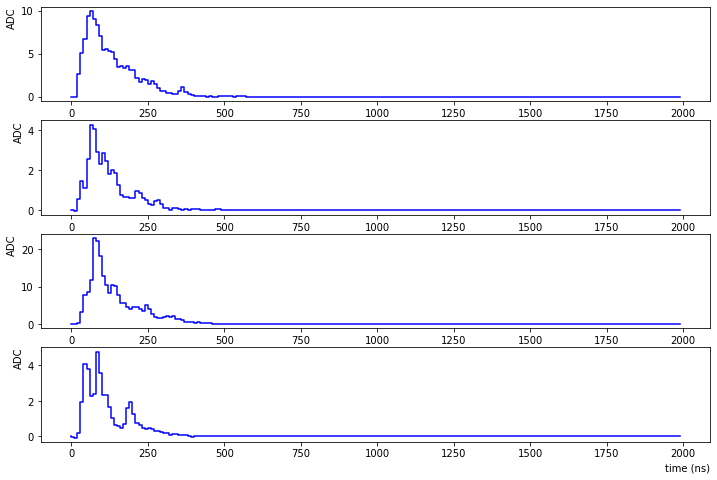

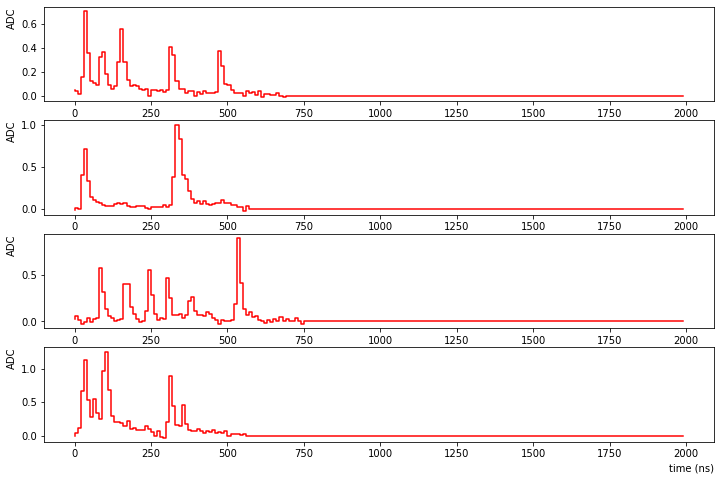

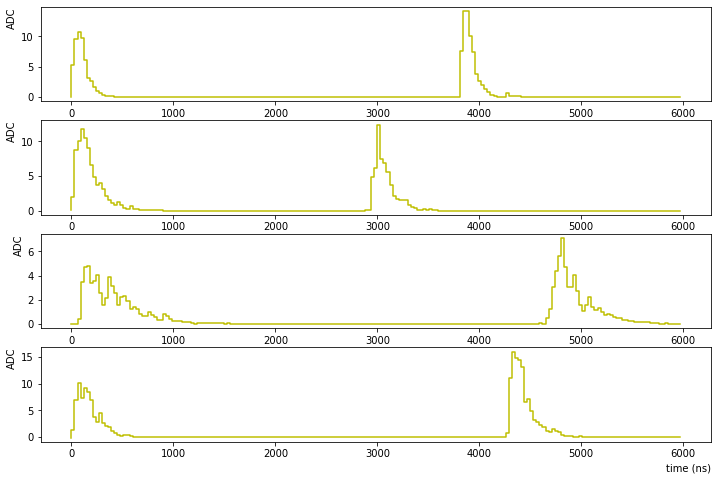

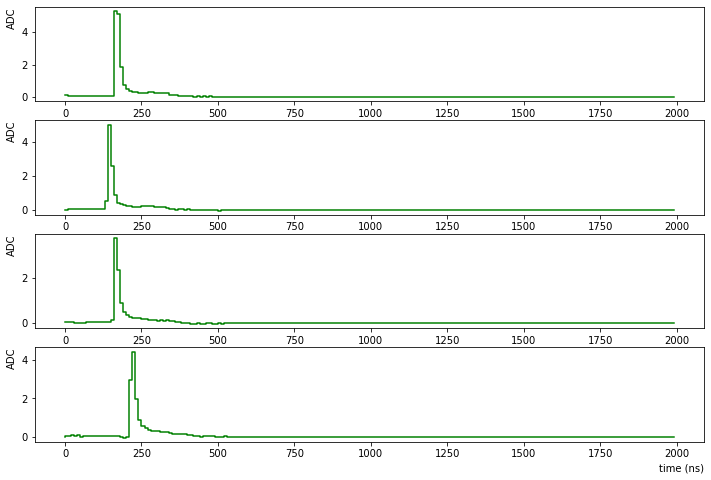

In [35]:
peaks=peaks5
plotwf(peaks,4,area_cut1,width_cut1,'b')
plotwf(peaks,4,area_cut2,width_cut2,'r')
plotwf(peaks,4,area_cut3,width_cut3,'y')
plotwf(peaks,4,area_cut4,width_cut4,'g')

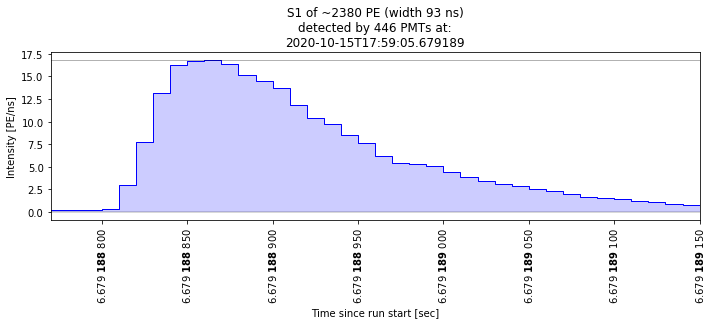

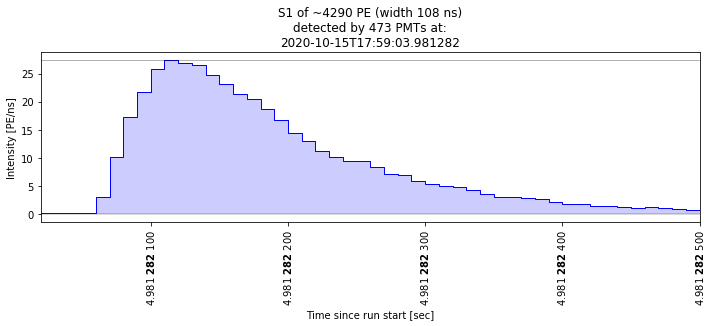

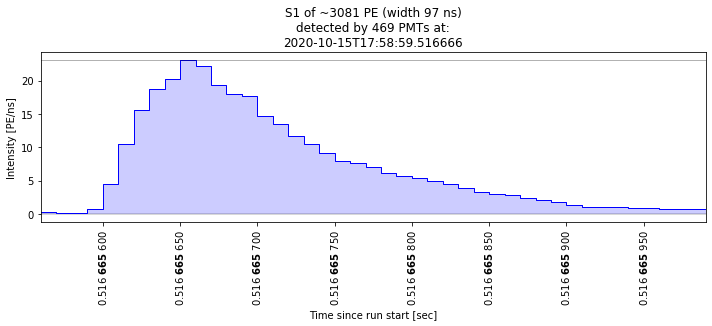

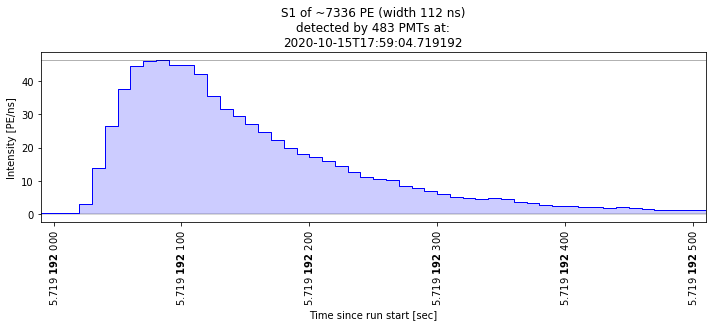

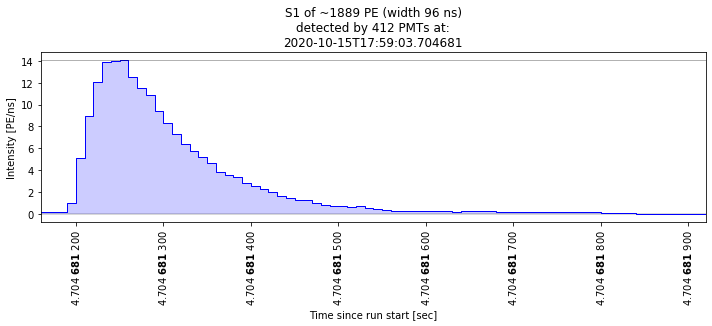

In [48]:
plot_some_peaks(selected_peaks1, max_plots = 5, randomize = 1)

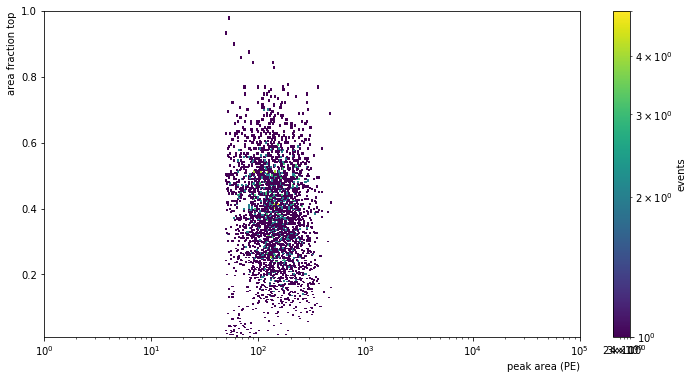